In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install textblob

from datetime import datetime
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import glob

path = r'/content/drive/Shareddrives/MSBA 22 Study Group/BANA212 Data and Programming Analytics/Group Project/csv/' # use your path
all_movies = glob.glob(path + "/*.csv")

li = []

for filename in all_movies:
    df = pd.read_csv(filename, index_col=None, header=0)
    df["movie_name"] = filename[110:]
    df["movie_id"] = filename[105:109]
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data

,Unnamed: 0,rating,review date,review content,movie_name,movie_id
0,0,8.0,8 January 2021,Fern (Frances McDormand) is houseless and livi...,Nomadland.csv,2020
1,1,9.0,24 June 2021,When people put themselves in vulnerable posit...,Nomadland.csv,2020
2,2,6.0,2 August 2021,"""Nomadland"" is a new American movie that premi...",Nomadland.csv,2020
3,3,7.0,18 February 2021,Nomadland is an exploration of people living i...,Nomadland.csv,2020
4,4,5.0,26 May 2021,"Frances McDormand loses her job in Empire, Nev...",Nomadland.csv,2020
...,...,...,...,...,...,...
49069,504,10.0,5 November 2005,I first saw this movie in the theater when it ...,DancesWithWolves.csv,1990
49070,505,10.0,11 January 2020,I saw this movie on the big screen when it was...,DancesWithWolves.csv,1990
49071,506,10.0,22 June 2019,"Great movie!!!! I love the music, history and ...",DancesWithWolves.csv,1990
49072,507,10.0,22 November 2005,I am listening to the soundtrack as I pen thes...,DancesWithWolves.csv,1990


In [4]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data["review_date"] = pd.to_datetime(data["review_date"])

data = data.dropna()

data_new = data[data["rating"] != -1]
data_new.reset_index(drop = True, inplace= True)

d1 = data_new["review_content"].str.lower()
print(d1)

data_new["review_content"] = d1

data_keywords = data_new[data_new["review_content"].str.contains("oscar")|data_new["review_content"].str.contains("award")|data_new["review_content"].str.contains("nomination")|data_new["review_content"].str.contains("academy")]
data_keywords.reset_index(drop = True, inplace= True)
data_keywords

0        fern (frances mcdormand) is houseless and livi...
1        when people put themselves in vulnerable posit...
2        "nomadland" is a new american movie that premi...
3        nomadland is an exploration of people living i...
4        frances mcdormand loses her job in empire, nev...
                               ...                        
44178    i first saw this movie in the theater when it ...
44179    i saw this movie on the big screen when it was...
44180    great movie!!!! i love the music, history and ...
44181    i am listening to the soundtrack as i pen thes...
44182    the title infers a movie about dancing and a n...
Name: review_content, Length: 44183, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Unnamed:_0,rating,review_date,review_content,movie_name,movie_id
0,2,6.0,2021-08-02,"""nomadland"" is a new american movie that premi...",Nomadland.csv,2020
1,4,5.0,2021-05-26,"frances mcdormand loses her job in empire, nev...",Nomadland.csv,2020
2,5,9.0,2021-07-18,or restless - and really going directly at som...,Nomadland.csv,2020
3,7,10.0,2021-03-09,"without a doubt, frances mcdormand has been on...",Nomadland.csv,2020
4,8,7.0,2021-04-19,no worldwide pandemic was going to stop awards...,Nomadland.csv,2020
...,...,...,...,...,...,...
12309,480,10.0,2005-01-01,if you consider this film awful then you can't...,DancesWithWolves.csv,1990
12310,486,1.0,2005-03-13,how this movie won so many oscars i will never...,DancesWithWolves.csv,1990
12311,489,5.0,2005-06-20,"**may contain spoilers** i like westerns, and ...",DancesWithWolves.csv,1990
12312,499,10.0,2017-01-19,what to say about this film in particular? i f...,DancesWithWolves.csv,1990


In [5]:
# import string
# punct = string.punctuation

# from spacy.lang.en.stop_words import STOP_WORDS
# stopwords = list(STOP_WORDS)

# import spacy

# nlp = spacy.load('en_core_web_sm')

# def text_data_cleaning(sentence):
#   doc = nlp(sentence)

#   tokens = []
#   for token in doc:
#     if token.lemma_ != "-PRON-":
#       temp = token.lemma_.lower().strip()
#     else:
#       temp = token.lower_
#     tokens.append(temp)

#   cleaned_tokens = []
#   for token in tokens:
#     if token not in stopwords and token not in punct:
#       cleaned_tokens.append(token)
#   return cleaned_tokens  

In [6]:
# all_keywords_review = []
# for i in range(0, len(data_keywords)):
#   cleaning = text_data_cleaning(data_keywords["review_content"][i])  
#   all_keywords_review.append(cleaning)

# print(all_keywords_review)

# flat_list = [item for sublist in all_keywords_review for item in sublist]
# print('Original list', all_keywords_review)
# print('Transformed list', flat_list)



In [7]:
# from collections import defaultdict
# # my_list = list(data_keywords["review_content"])

# # print("The list is :")
# # print(my_list)

# # trial1 = text_data_cleaning(data_keywords["review_content"][2])
# # trial1

# # my_temp = defaultdict(int)

# # for sub in trial1:
# #    for word in sub.split():
# #       my_temp[word] += 1

# # result = max(my_temp, key=my_temp.get)

# # print("The word that has the maximum frequency :")
# # print(result)



# wordfreq = []
# for w in flat_list:
#     wordfreq.append(flat_list.count(w))

# print("Pairs\n" + str(list(zip(flat_list, wordfreq))))

In [8]:
data_keywords.groupby("movie_name").count()

a = data_keywords.groupby("movie_name").rating.mean()
b = data_new.groupby("movie_name").rating.mean()

comparison = pd.DataFrame([a,b])
pd.set_option("display.max_columns", None)

print(comparison)

comparison.to_csv("comparison.csv")

movie_name  12YearsASlave.csv  ABeautifulMind.csv  AmericanBeauty.csv  \
rating               7.809061            7.819635            7.614925   
rating               7.929047            7.960148            7.959780   

movie_name  Argo.csv  Birdman.csv  Braveheart.csv  Chicago.csv  Crash.csv  \
rating      7.281734     6.387550        8.084577     7.050794   6.220807   
rating      7.221271     6.462358        8.241438     7.484700   6.774053   

movie_name  DancesWithWolves.csv  ForrestGump.csv  Gladiator.csv  \
rating                  8.504274         8.221709       7.907923   
rating                  8.377778         8.827386       8.120953   

movie_name  GreenBook.csv  MillionDollarBaby.csv  Moonlight.csv  \
rating           8.451087               7.582310       5.678571   
rating           8.699631               7.837476       6.597884   

movie_name  NoCountryForOldMen.csv  Nomadland.csv  Parasite.csv  \
rating                    6.358025       6.070866      7.120924   
rating 

In [9]:
data_new["review_content"][127]

'nomadland is an absolutely awesome film that is on its way of sweeping the oscars this year.'

In [10]:
text_blob_object = TextBlob(data_new["review_content"][8])
print(text_blob_object.sentiment)

Sentiment(polarity=0.27947379197379196, subjectivity=0.420962325962326)


In [11]:
data_new['Sentiment'] = data_new['rating'].apply(lambda x: "positive" if x>=7 else("negative" if x<=4.9 else "neutral"))
data_new



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed:_0,rating,review_date,review_content,movie_name,movie_id,Sentiment
0,0,8.0,2021-01-08,fern (frances mcdormand) is houseless and livi...,Nomadland.csv,2020,positive
1,1,9.0,2021-06-24,when people put themselves in vulnerable posit...,Nomadland.csv,2020,positive
2,2,6.0,2021-08-02,"""nomadland"" is a new american movie that premi...",Nomadland.csv,2020,neutral
3,3,7.0,2021-02-18,nomadland is an exploration of people living i...,Nomadland.csv,2020,positive
4,4,5.0,2021-05-26,"frances mcdormand loses her job in empire, nev...",Nomadland.csv,2020,neutral
...,...,...,...,...,...,...,...
44178,504,10.0,2005-11-05,i first saw this movie in the theater when it ...,DancesWithWolves.csv,1990,positive
44179,505,10.0,2020-01-11,i saw this movie on the big screen when it was...,DancesWithWolves.csv,1990,positive
44180,506,10.0,2019-06-22,"great movie!!!! i love the music, history and ...",DancesWithWolves.csv,1990,positive
44181,507,10.0,2005-11-22,i am listening to the soundtrack as i pen thes...,DancesWithWolves.csv,1990,positive


In [12]:
# from datetime import datetime

# before = pd.DataFrame()
# after = pd.DataFrame()
# list1 = ["Nomadland.csv"]

# year = 2020
# for title in list1:
#   before.append(df.loc[df[review_date] < datetime(year, 02, 01)][movie_name])
#   after.append(df[title].loc[df[review_date] >= datetime(year, 02, 01)])
#   year -= 1



In [13]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

data_new['Sentiment_Polarity'] = data_new['review_content'].apply(find_pol)

data_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed:_0,rating,review_date,review_content,movie_name,movie_id,Sentiment,Sentiment_Polarity
0,0,8.0,2021-01-08,fern (frances mcdormand) is houseless and livi...,Nomadland.csv,2020,positive,0.196138
1,1,9.0,2021-06-24,when people put themselves in vulnerable posit...,Nomadland.csv,2020,positive,0.032341
2,2,6.0,2021-08-02,"""nomadland"" is a new american movie that premi...",Nomadland.csv,2020,neutral,0.167655
3,3,7.0,2021-02-18,nomadland is an exploration of people living i...,Nomadland.csv,2020,positive,0.091618
4,4,5.0,2021-05-26,"frances mcdormand loses her job in empire, nev...",Nomadland.csv,2020,neutral,0.000490


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


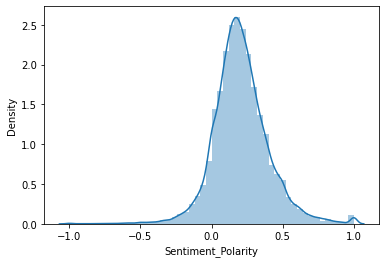

In [14]:
sns.distplot(data_new['Sentiment_Polarity'])

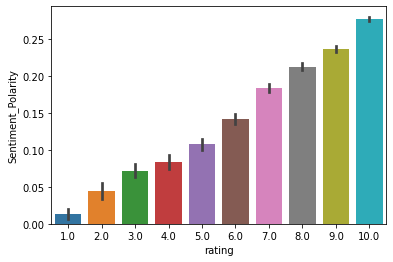

In [15]:
sns.barplot(x = 'rating', y = 'Sentiment_Polarity', data = data_new)

In [16]:
most_negative = data_new[data_new.Sentiment_Polarity == -1][["review_content", "rating", "movie_name"]].head()
print(most_negative)

                                         review_content  rating     movie_name
136   no script, just an outline and ad lib for 90 m...     2.0  Nomadland.csv
359   if you want to know a movie how could be borin...     1.0  Nomadland.csv
641   i don't understand how this deserved an oscar\...     4.0  Nomadland.csv
3502  the worst film i see in my life. its boring, h...     1.0   Parasite.csv
3860  what a boring movie. i can't believe there are...     1.0   Parasite.csv


In [17]:
most_positive = data_new[data_new.Sentiment_Polarity == 1][["review_content", "rating", "movie_name"]].head()
print(most_positive)

                                         review_content  rating     movie_name
127   nomadland is an absolutely awesome film that i...    10.0  Nomadland.csv
834   a perfect movie with the best detail and honor...    10.0  Nomadland.csv
1128  this is the best movie of 2019, over.\nrespect...    10.0   Parasite.csv
1493  parasite is one of the best movies that i've s...    10.0   Parasite.csv
1624  *son...*channeling lanthimos, dogtooth on a ca...     9.0   Parasite.csv


In [18]:
# data['Overall_Review'] = data['Sentiment_Polarity'].apply(lambda x: -1 if x<0.15 else(1 if x>0.20 else 0))

# data.head()

In [19]:
# b = data["rating"]
# a = data["Sentiment_Polarity"]


# plt.scatter(a, b)
# plt.show()


Word Cloud

In [20]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

data_new['review_content_lower'] = data_new['review_content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data_new['review_content_lower'] = data_new['review_content'].str.replace('[^\w\s]', "")
data_new.review_content_lower.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    fern frances mcdormand is houseless and living...
1    when people put themselves in vulnerable posit...
2    nomadland is a new american movie that premier...
3    nomadland is an exploration of people living i...
4    frances mcdormand loses her job in empire neva...
Name: review_content_lower, dtype: object

Removal of Stop Words

In [22]:
import nltk
nltk.download('wordnet')

stop = stopwords.words('english')
data_new['review_content_lower'] = data_new['review_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_new.review_content_lower.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    fern (frances mcdormand) houseless living van ...
1    people put vulnerable positions, bad things ha...
2    "nomadland" new american movie premiered back ...
3    nomadland exploration people living vans house...
4    frances mcdormand loses job empire, nevada liv...
Name: review_content_lower, dtype: object

In [23]:

data_new['review_content_lower'] = data_new['review_content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_new.review_content_lower.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    fern (frances mcdormand) is houseless and livi...
1    when people put themselves in vulnerable posit...
2    "nomadland" is a new american movie that premi...
3    nomadland is an exploration of people living i...
4    france mcdormand loses her job in empire, neva...
Name: review_content_lower, dtype: object

In [24]:
! pip install wordcloud

In [25]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [26]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = data_new
# Dropping null values
reviews.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
score_1 = reviews[reviews['rating'] == 1]
score_2 = reviews[reviews['rating'] == 2]
score_3 = reviews[reviews['rating'] == 3]
score_4 = reviews[reviews['rating'] == 4]
score_5 = reviews[reviews['rating'] == 5]
score_6 = reviews[reviews['rating'] == 6]
score_7 = reviews[reviews['rating'] == 7]
score_8 = reviews[reviews['rating'] == 8]
score_9 = reviews[reviews['rating'] == 9]
score_10 = reviews[reviews['rating'] == 10]


In [28]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5, score_6, score_7, score_8, score_9, score_10],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

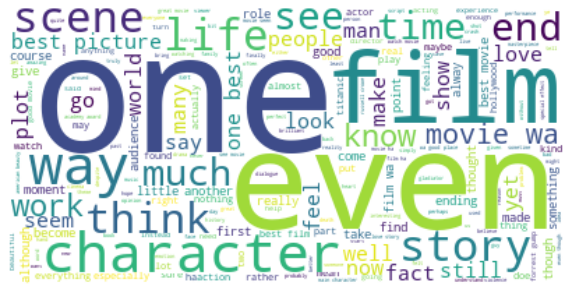

In [29]:
reviews_str = reviews_sample.review_content_lower.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating'].isin([1,2,3,4]) ]
positive_reviews = reviews_sample[reviews_sample['rating'].isin([7,8,9,10]) ]
# Transform to single string
negative_reviews_str = negative_reviews.review_content_lower.str.cat()
positive_reviews_str = positive_reviews.review_content_lower.str.cat()

In [58]:
!pip install nltk
import nltk
nltk.download("brown")
nltk.download('averaged_perceptron_tagger')
nltk.download("punkt")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
neg_rev_words = nltk.word_tokenize(negative_reviews_str)
neg_rev_words = nltk.pos_tag(neg_rev_words)
neg_words = ''
for tp in neg_rev_words:
  if tp[0] == "movie" or tp[0] == "film":
    continue
  if tp[1][0] == 'N':
    neg_words += tp[0] + ' '

Text(0.5, 1.0, 'Reviews with Negative Scores')

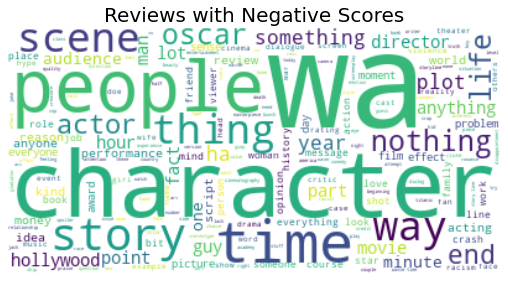

In [81]:
wordcloud_negative = WordCloud(background_color='white').generate(neg_words)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

In [82]:
pos_rev_words = nltk.word_tokenize(positive_reviews_str)
pos_rev_words = nltk.pos_tag(pos_rev_words)
pos_words = ''
for tp in pos_rev_words:
  if tp[0] == "movie" or tp[0] == "film":
    continue
  if tp[1][0] == 'N':
    pos_words += tp[0] + ' '

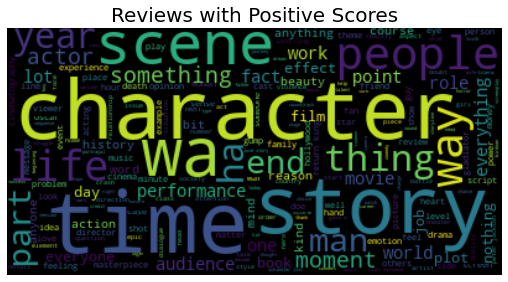

In [83]:
wordcloud_positive = WordCloud(background_color='black').generate(pos_words)
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()